#### Hierarchical Clustering - Agglomerative

We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Remember that agglomerative is the bottom up approach. 

In [243]:
import numpy as np 
import pandas as pd

In [244]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv'
df = pd.read_csv(url)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [245]:
df_new = df[[ 'sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df_new.dropna(inplace = True)
df_new = round(df_new, 2)
df_new = df_new.reset_index(drop = True)
df_new

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.92,16.36,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0,2.83
1,39.38,19.88,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0,3.67
2,8.59,29.72,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0,2.15
3,20.40,22.26,0.0,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0,3.02
4,18.78,23.56,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.56,18.5,22.0,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,9.76,11.42,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.77,14.5,26.0,2.28
113,83.72,13.24,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.85,14.5,26.0,4.43
114,51.10,16.73,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.04,16.4,27.0,3.93
115,9.57,16.58,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.08,13.7,26.0,2.26


In [246]:
X = np.asanyarray(df_new[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']])
X

array([[  1.8 , 140.  , 101.2 ,  67.3 , 172.4 ,   2.64,  13.2 ,  28.  ],
       [  3.2 , 225.  , 108.1 ,  70.3 , 192.9 ,   3.52,  17.2 ,  25.  ],
       [  3.5 , 210.  , 114.6 ,  71.4 , 196.6 ,   3.85,  18.  ,  22.  ],
       [  1.8 , 150.  , 102.6 ,  68.2 , 178.  ,   3.  ,  16.4 ,  27.  ],
       [  2.8 , 200.  , 108.7 ,  76.1 , 192.  ,   3.56,  18.5 ,  22.  ],
       [  4.2 , 310.  , 113.  ,  74.  , 198.2 ,   3.9 ,  23.7 ,  21.  ],
       [  2.8 , 193.  , 107.3 ,  68.5 , 176.  ,   3.2 ,  16.6 ,  24.  ],
       [  2.8 , 193.  , 111.4 ,  70.9 , 188.  ,   3.47,  18.5 ,  24.8 ],
       [  3.1 , 175.  , 109.  ,  72.7 , 194.6 ,   3.37,  17.5 ,  25.  ],
       [  3.8 , 240.  , 109.  ,  72.7 , 196.2 ,   3.54,  17.5 ,  23.  ],
       [  3.8 , 205.  , 113.8 ,  74.7 , 206.8 ,   3.78,  18.5 ,  24.  ],
       [  3.8 , 205.  , 112.2 ,  73.5 , 200.  ,   3.59,  17.5 ,  25.  ],
       [  4.6 , 275.  , 115.3 ,  74.5 , 207.2 ,   3.98,  18.5 ,  22.  ],
       [  4.6 , 275.  , 108.  ,  75.5 , 200.6 ,   3

In [247]:
from sklearn.preprocessing import MinMaxScaler # Normalizing X
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.22981366, 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50310559, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60559006, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34161491, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.51552795, 0.37788018, 0.23333333]])

In [292]:
from sklearn.cluster import AgglomerativeClustering # Modelling X
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
agglom.fit(feature_mtx)
agglom.labels_[:22]

array([3, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 3],
      dtype=int64)

In [293]:
df_new['cluster_label'] = agglom.labels_ # Adding cluster labels in the dataset
df_new.head()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,cluster_label
0,16.92,16.36,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0,2.83,3
1,39.38,19.88,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0,3.67,0
2,8.59,29.72,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0,2.15,0
3,20.40,22.26,0.0,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0,3.02,4
4,18.78,23.56,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.56,18.5,22.0,2.93,0


In [294]:
df_new.groupby(['cluster_label','type'])['cluster_label'].count() #Counting each vehicle type in each cluster, 1 being truck & 0 being car

cluster_label  type
0              0.0     37
               1.0      9
1              0.0      7
               1.0     11
2              1.0      6
3              0.0     18
               1.0      1
4              0.0     26
               1.0      2
Name: cluster_label, dtype: int64

In [295]:
agg_cars = df_new.groupby(['cluster_label','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars = round(agg_cars, 2)
agg_cars

horsepow  engine_s    mpg  price
cluster_label type                                  
0             0.0     217.54      3.60  23.48  31.84
              1.0     158.22      2.92  22.00  21.01
1             0.0     296.43      4.46  20.71  58.70
              1.0     183.00      3.50  19.18  26.05
2             1.0     211.67      4.48  16.17  29.03
3             0.0     113.67      1.81  30.61  14.18
              1.0     127.00      2.00  27.00  16.89
4             0.0     150.69      2.37  26.04  19.06
              1.0     144.00      2.20  23.50  16.04

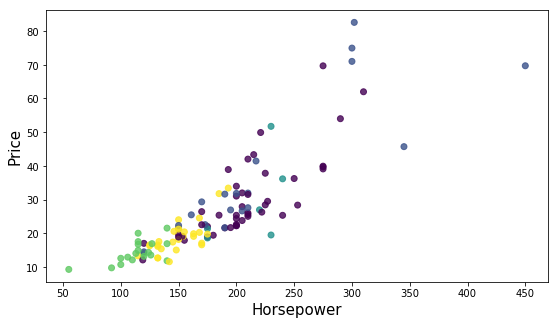

In [296]:
plt.figure(figsize=(9,5)) # Visualizing Results
plt.scatter(df_new['horsepow'], df_new['price'],  c=agglom.labels_.astype(np.float), alpha = 0.8)
plt.xlabel('Horsepower', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()